<a href="https://colab.research.google.com/github/shitodcy/Convolutional-Neural-Network-CNN-motif-batik/blob/main/Convolutional_Neural_Network_(CNN)_motif_batik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nama: Arya Putra Bahari
# NIM: 23.11.5494
# Digit Terakhir NIM: 4

In [ ]:
import os
import zipfile
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import mixed_precision
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import BatchNormalization

In [ ]:
!wget --no-check-certificate \
  "https://github.com/annaamikom/dataset-batik/archive/refs/heads/main.zip" \
  -O /tmp/batik_dataset.zip

local_zip = '/tmp/batik_dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/dataset-batik-main/dataset-batik'
print("Isi direktori utama:", os.listdir(base_dir))

class_names = sorted(os.listdir(os.path.join(base_dir, 'training')))
print("Kelas motif batik:", class_names)


--2025-07-23 18:14:02--  https://github.com/annaamikom/dataset-batik/archive/refs/heads/main.zip
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/annaamikom/dataset-batik/zip/refs/heads/main [following]
--2025-07-23 18:14:02--  https://codeload.github.com/annaamikom/dataset-batik/zip/refs/heads/main
Resolving codeload.github.com (codeload.github.com)... 20.205.243.165
Connecting to codeload.github.com (codeload.github.com)|20.205.243.165|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘/tmp/batik_dataset.zip’

/tmp/batik_dataset.     [ <=>                ] 262.44M  17.3MB/s    in 15s     

2025-07-23 18:14:18 (17.4 MB/s) - ‘/tmp/batik_dataset.zip’ saved [275191364]

Isi direktori utama: ['testing', 'training']
Kelas motif batik: ['batik-bali', 'batik-betawi', 

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.2,
    validation_split=0.2
)

test_datagen = ImageDataGenerator(rescale=1./255)

BATCH_SIZE = 10

train_generator = train_datagen.flow_from_directory(
    os.path.join(base_dir, 'training'),
    target_size=(150, 150),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    os.path.join(base_dir, 'training'),
    target_size=(150, 150),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    os.path.join(base_dir, 'testing'),
    target_size=(150, 150),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

Found 633 images belonging to 20 classes.
Found 154 images belonging to 20 classes.
Found 194 images belonging to 20 classes.


In [ ]:
model = Sequential([

    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(256, activation='relu', kernel_regularizer=l2(1.899)),
    Dropout(0.5),
    Dense(len(class_names), activation='softmax')
])

mixed_precision.set_global_policy('mixed_float16')
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 148, 148, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 72, 72, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 34, 34, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     9,470,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 20)             │         5,140 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,569,492 (36.50 MB)

 Trainable params: 9,569,044 (36.50 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
steps_per_epoch = train_generator.samples
validation_steps = validation_generator.samples

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    callbacks=[early_stopping],
    verbose=2
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


633/633 - 26s - 42ms/step - accuracy: 0.0806 - loss: 588.7789 - val_accuracy: 0.0455 - val_loss: 295.9508
Epoch 2/50
633/633 - 13s - 21ms/step - accuracy: 0.0837 - loss: 160.4415 - val_accuracy: 0.0455 - val_loss: 71.4553
Epoch 3/50
633/633 - 13s - 20ms/step - accuracy: 0.0806 - loss: 38.0773 - val_accuracy: 0.0519 - val_loss: 18.6968
Epoch 4/50
633/633 - 21s - 33ms/step - accuracy: 0.0806 - loss: 10.6699 - val_accuracy: 0.0455 - val_loss: 7.5265
Epoch 5/50
633/633 - 13s - 20ms/step - accuracy: 0.0853 - loss: 5.4807 - val_accuracy: 0.0455 - val_loss: 5.0850
Epoch 6/50
633/633 - 20s - 32ms/step - accuracy: 0.0537 - loss: 4.6102 - val_accuracy: 0.0844 - val_loss: 4.4289
Epoch 7/50
633/633 - 15s - 24ms/step - accuracy: 0.0695 - loss: 4.2442 - val_accuracy: 0.0909 - val_loss: 4.0915
Epoch 8/50
633/633 - 13s - 20ms/step - accuracy: 0.0727 - loss: 3.9190 - val_accuracy: 0.0584 - val_loss: 3.7727
Epoch 9/50
633/633 - 23s - 36ms/step - accuracy: 0.0869 - loss: 3.7435 - val_accuracy: 0.0519 - v

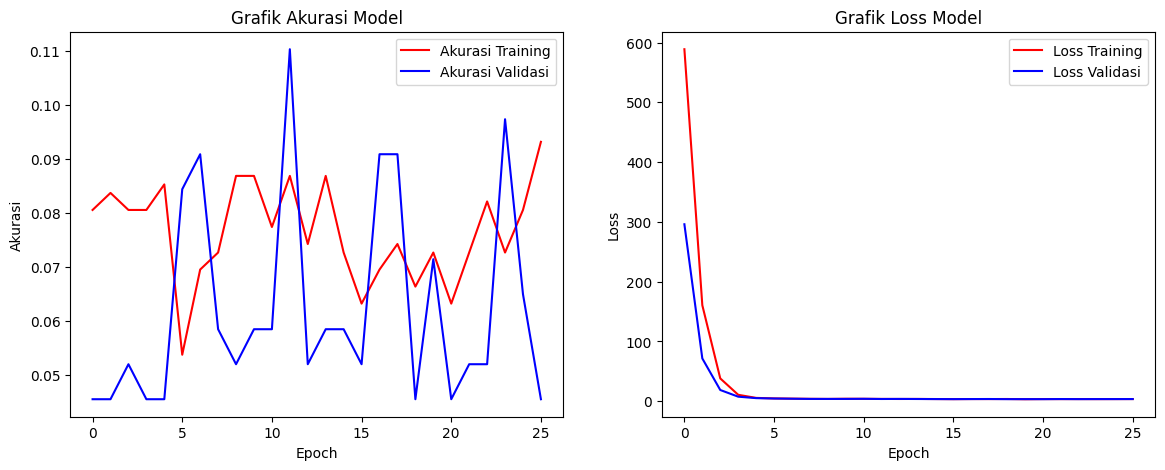

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'r', label='Akurasi Training')
plt.plot(epochs, val_acc, 'b', label='Akurasi Validasi')
plt.title('Grafik Akurasi Model')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend(loc=0)

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'r', label='Loss Training')
plt.plot(epochs, val_loss, 'b', label='Loss Validasi')
plt.title('Grafik Loss Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc=0)

plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"\nAkurasi pada Test Set: {test_accuracy*100:.2f}%")
print(f"Loss pada Test Set: {test_loss:.4f}")

20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step - accuracy: 0.0735 - loss: 3.3957

Akurasi pada Test Set: 6.70%
Loss pada Test Set: 3.3829


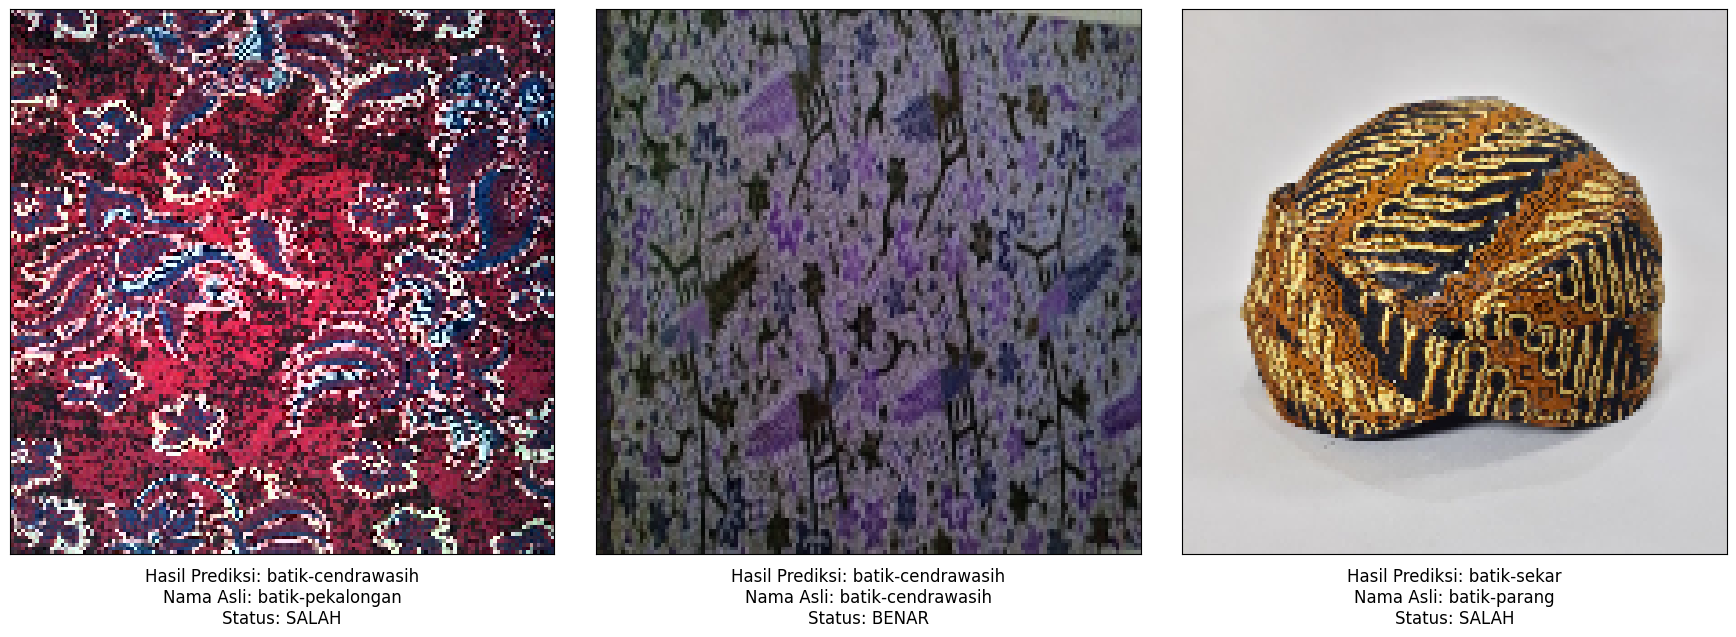

In [ ]:

all_images_with_class = []
for class_folder in os.listdir(base_dir):
    class_path = os.path.join(base_dir, class_folder)

    if os.path.isdir(class_path):
        for image_file in os.listdir(class_path):
            image_path = os.path.join(class_path, image_file)
            all_images_with_class.append((image_path, class_folder))

random.shuffle(all_images_with_class)
rows = 1
cols = 3
num_images_to_display = rows * cols

fig, axes = plt.subplots(rows, cols, figsize=(18, 7))
if num_images_to_display > 1:
    axes = axes.ravel()
else:
    axes = [axes]

for i in range(num_images_to_display):
    if i >= len(all_images_with_class):
        axes[i].axis('off')
        continue

    image_path, true_class = all_images_with_class[i]
    img = image.load_img(image_path, target_size=(150, 150))

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = x / 255.0

    classes = model.predict(x, verbose=0)
    predicted_class_index = np.argmax(classes[0])
    predicted_class_name = class_names[predicted_class_index]
    status = "BENAR" if predicted_class_name == true_class else "SALAH"

    info_text = (
        f"Hasil Prediksi: {predicted_class_name}\n"
        f"Nama Asli: {true_class}\n"
        f"Status: {status}"
    )

    axes[i].imshow(img)
    axes[i].set_xlabel(info_text, fontsize=12, labelpad=10)
    axes[i].set_xticks([])
    axes[i].set_yticks([])

plt.tight_layout(pad=3.0)
plt.show()

